In [44]:
import pandas as pd
import numpy as np
import requests
import json

key = '16effcabd5d51ae74821b3639db3844d8c7f1beb'
area = 'state'

url = f'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,PAYANN&for={area}:*&key={key}'
url2 = f'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP,OWNPDEMP_F&for={area}:*&key={key}'
a = requests.get(url).json()
b = requests.get(url2).json()

In [103]:

cs = 'company_summary_census_data_2018.json'
with open(cs,'wt') as census:
    json.dump(a, census)
os = 'owner_summary_census_data_2018.json'
with open(os,'wt') as census2:
    json.dump(b, census2)

In [128]:

pd_cs = pd.read_json(cs)
pd_os = pd.read_json(os)
# Renames the headers
pd_cs.rename(columns=pd_cs.iloc[0],inplace=True)
pd_cs.drop(0,inplace=True)
pd_cs = pd_cs[pd_cs['EMPSZFI_LABEL'] == 'Firms with 50 to 99 employees']

pd_os.rename(columns=pd_os.iloc[0],inplace=True)
pd_os.drop(0,inplace=True)

In [130]:
pd_os2 = pd_os[pd_os['OWNCHAR_LABEL'] == '2000 to 2007']

,GEO_ID,NAME,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP,OWNPDEMP_F,state
4,0400000US28,Mississippi,CI01,2000 to 2007,5251,None,28
14,0400000US29,Missouri,CI01,2000 to 2007,15577,None,29
24,0400000US30,Montana,CI01,2000 to 2007,5748,None,30
34,0400000US31,Nebraska,CI01,2000 to 2007,7215,None,31
44,0400000US32,Nevada,CI01,2000 to 2007,6395,None,32
54,0400000US33,New Hampshire,CI01,2000 to 2007,3441,None,33
64,0400000US34,New Jersey,CI01,2000 to 2007,23790,None,34
74,0400000US35,New Mexico,CI01,2000 to 2007,4153,None,35
84,0400000US36,New York,CI01,2000 to 2007,46833,None,36
98,0400000US37,North Carolina,CI01,2000 to 2007,27811,None,37


In [144]:
pd_os = pd_os[pd_os['OWNCHAR_LABEL'] == '2008 to 2012']

In [145]:
merge = pd_cs.merge(pd_os,on = 'NAME',how='inner')
merge2=pd_cs.merge(pd_os2,on = 'NAME',how='inner')

In [146]:
merge.drop(['GEO_ID_x','FIRMPDEMP_F','RCPPDEMP','RCPPDEMP_F','state_x','GEO_ID_y','OWNCHAR','OWNPDEMP_F','state_y'],inplace=True,axis=1)
merge2.drop(['GEO_ID_x','FIRMPDEMP_F','RCPPDEMP','RCPPDEMP_F','state_x','GEO_ID_y','OWNCHAR','OWNPDEMP_F','state_y'],inplace=True,axis=1)

In [147]:
#Number of owners of respondent employer firms with 500+ employees established between 2008 - 2012, in MN,NY,and WI
filtered_state = merge[merge['NAME'].isin(['New York','Minnesota','Wisconsin'])]
filtered_state2 = merge2[merge2['NAME'].isin(['New York','Minnesota','Wisconsin'])]
#convert to numeric
filtered_state.OWNPDEMP=filtered_state.OWNPDEMP.astype(int)
filtered_state2.OWNPDEMP=filtered_state2.OWNPDEMP.astype(int)

/Users/negomiaoz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,NAME,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,EMP,PAYANN,OWNCHAR_LABEL,OWNPDEMP
8,New York,642,Firms with 50 to 99 employees,8464,516813,29917916,2008 to 2012,38177
25,Wisconsin,642,Firms with 50 to 99 employees,3232,202667,10082527,2008 to 2012,11485
50,Minnesota,642,Firms with 50 to 99 employees,0,0,0,2008 to 2012,14571


<AxesSubplot:>

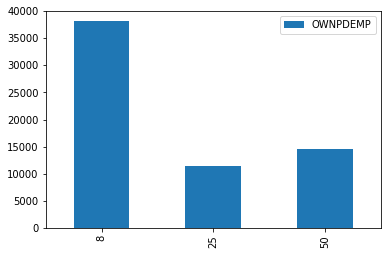

<AxesSubplot:>

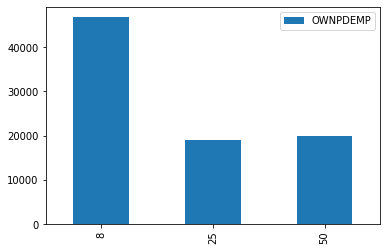

In [149]:
.plot(kind='bar')

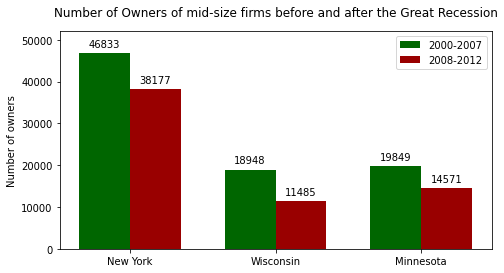

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars
fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, filtered_state2['OWNPDEMP'], width, label='2000-2007',color='#006600')
rects2 = ax.bar(x + width/2, filtered_state['OWNPDEMP'], width, label='2008-2012',color='#990000')
#set labels
ax.set_ylabel('Number of owners')
ax.set_title('Number of Owners of mid-size firms before and after the Great Recession',pad=15)
#set legend location
ax.legend(loc=0)
#set y axis limit
ax.set_ylim([0, 52000])
ax.set_xticks(x,filtered_state['NAME'].values)
ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)
#make graph wider
fig.subplots_adjust(left=2,right=3)
plt.show()


array(['New York', 'Wisconsin', 'Minnesota'], dtype=object)